In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [2]:
class LRegression:
    def __init__(self, x, y, color, title, filename, xlabel, ylabel):
        self.x = x
        self.y = y
        self.x_mean = stat.mean(x)
        self.y_mean = stat.mean(y)

        self.color = color
        self.title = title
        self.filename = filename
        self.xlabel = xlabel
        self.ylabel = ylabel
    
    def get(self):
        #definicao do coeficiente angular (a):
        a_def = 0
        for i in range(len(self.x)):
            a_def += ((self.x[i]-self.x_mean) * (self.y[i]-self.y_mean))
        a_div = 0
        for i in range(len(self.x)):
            a_div += pow((self.x[i] - self.x_mean), 2)
        a = (a_def/a_div)
        b = self.y_mean - (self.x_mean * a) #definicao do coeficiente linear (b)
        
        #incerteza de Y
        incY = 0
        for i in range(len(self.x)):
            incY += pow((self.y[i] - (a * self.x[i] + b)), 2)
        
        incY *= (1/(len(self.x)-2))
        incY = pow(incY, 0.5)
    	
        #incerteza de a:
        incA = 0
        incA = pow(a_div, -1)
        incA = pow(incA, 0.5)
        incA *= incY
        
        #incerteza de b:
        incB = 0
        for i in range(len(self.x)):
            incB += (pow(self.x[i], 2))

        incB*= (1/len(self.x))
        incB = incB/a_div
        incB = pow(incB, 0.5)
        incB*= incY

        y=[]
        for i in range(len(self.x)):
            y.append(a*self.x[i]+b)
       
        
        plt.plot(self.x, self.y, 'k^', label='Dados coletados')
        plt.plot(self.x, y, self.color, label=f'Regressão linear (y = {a :.6f}x + {b :.6f})')
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.grid(True)
        plt.savefig(self.filename, dpi=100, edgecolor="#04253a")
        plt.show() #plot do grafico

        return a, b, incA, incB, incY


[2.0565, 1.6565, 1.2835, 1.15, 1.0285, 0.945, 0.8789999999999999, 0.8220000000000001, 0.769, 0.7344999999999999, 0.709, 0.6719999999999999, 0.6295, 0.6285000000000001, 0.6035, 0.5755, 0.5635, 0.5425]


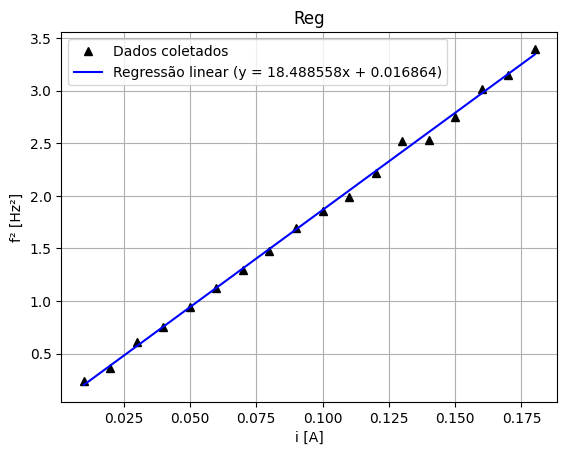

2.500305000000001e-07
0.2773789708814065
6.00130261279237e-07


In [3]:
I = [10, 20 ,30 ,40 ,50 ,60 ,70 ,80 ,90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
t20 =  [41.13, 33.13, 25.67, 23.00, 20.57, 18.90, 17.58, 16.44, 15.38, 14.69, 14.18, 13.44, 12.59, 12.57, 12.07, 11.51, 11.27, 10.85]
T = []
f = []
f2 = []


for i in range(len(t20)):
    T.append(t20[i]/20)
    f.append(1/T[i])
    f2.append(pow(f[i], 2))

for i in range(len(I)):
    I[i] *= pow(10, -3)

print(T)
regressao = LRegression(I, f2, 'b-', 'Reg', 'exp9-graph1.jpg', 'i [A]', 'f² [Hz²]')
a, b, incA, incB, incY = regressao.get()

r = 6.10*pow(10, -3) #m
l = 23.10*pow(10, -3) #m
R = 0.205 #m

M = 4.65*pow(10,-3)*(((pow(r, 2))/4) + ((pow(l, 2))/12))

mi = (a*np.pi*M*R*pow(5, 3/2))/(150*8*pow(10, -7))
print(M)
print(mi)

Bt = (b*4*pow(np.pi, 2)*M)/mi
print(Bt)
